# Pandas

## Introduction

Pandas stands for 'Python data access library', and is a very convenient way to handle tasks related to data in Python.

By convention, pandas and numpy are imported using their short-forms. Matplotlib and seaborn are also imported, they will be used later on for plotting.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Creating a DataFrame by reading a file

Obviously, in order to do any data-related task, we must first import the data. This is mostly done using `read_csv` (also type `pd.read` into any Jupyter cell and see what other read_* methods are available). The result (when read) is a Pandas DataFrame.

*Note:* Remember to use `help()` or `?` to check syntax for the pandas functions we'll be using in this notebook

In [ ]:
df = pd.read_csv('Iris_Data.csv')

Let's take a quick look at some information about the data.

In [ ]:
print("The first 5 values in the DataFrame")
print(df.head())
print("\nThe DataFrame has {} columns and {} rows.".format(df.shape[1], df.shape[0]))
print("\nThe titles of the DataFrames columns are:- ")
print(df.columns.tolist())
print("\nEach of them has a particular datatype")
print(df.dtypes)

The first 5 values in the DataFrame
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

The DataFrame has 5 columns and 150 rows.

The titles of the DataFrames columns are:- 
['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

Each of them has a particular datatype
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


## Editing a DataFrame

The species names all begin with 'Iris-', making that information redundant. Editing all the data in a particular column is something you will often have to do, whether it's text or numerical data. The following cell contains a few different methods for shortening the 'species' column values.

In [ ]:
df['species'] = df.species.str.replace('Iris-', '')
df['species'] = df.species.apply(lambda r: r.replace('Iris-', ''))

print(df.sample(10))

     sepal_length  sepal_width  petal_length  petal_width     species
81            5.5          2.4           3.7          1.0  versicolor
61            5.9          3.0           4.2          1.5  versicolor
92            5.8          2.6           4.0          1.2  versicolor
78            6.0          2.9           4.5          1.5  versicolor
23            5.1          3.3           1.7          0.5      setosa
139           6.9          3.1           5.4          2.1   virginica
118           7.7          2.6           6.9          2.3   virginica
33            5.5          4.2           1.4          0.2      setosa
128           6.4          2.8           5.6          2.1   virginica
93            5.0          2.3           3.3          1.0  versicolor


Key Differences
.str.replace() vs. .apply(lambda ...):

.str.replace() is specific to Pandas Series of strings and directly applies the string replacement operation.

.apply(lambda ...) is more general and can be used to apply any function to each element of a Pandas Series.

.str.replace() tends to be more efficient for string operations within Pandas due to optimized implementations.

.apply(lambda ...) may offer more flexibility but can be slower for large datasets or complex operations.

## Describing a DataFrame

Let's take a look at the built-in descriptive stats and count how many of each species we have in this dataset.

In [ ]:
df_stats = df.describe()
print(df_stats)
print('\nCounts of various species in the Iris dataset.')
print(df.species.value_counts())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

Counts of various species in the Iris dataset.
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


`df_stats` is itself a DataFrame and can be edited like one. For example, let's rename the 50%-quartile to 'median' (which is what it mathematically is) and calculate a new row called 'range' which is the difference between max and min.

In [ ]:
df_stats.rename({'50%': 'median'}, inplace=True)
df_stats.loc['range'] = df_stats.loc['max'] - df_stats.loc['min']  # Just a simple vector subtraction
print(df_stats)

        sepal_length  sepal_width  petal_length  petal_width
count     150.000000   150.000000    150.000000   150.000000
mean        5.843333     3.054000      3.758667     1.198667
std         0.828066     0.433594      1.764420     0.763161
min         4.300000     2.000000      1.000000     0.100000
25%         5.100000     2.800000      1.600000     0.300000
median      5.800000     3.000000      4.350000     1.300000
75%         6.400000     3.300000      5.100000     1.800000
max         7.900000     4.400000      6.900000     2.500000
range       3.600000     2.400000      5.900000     2.400000


## Aggregation and Grouping

We've already seen (from `describe()`) the mean and median of each of the 4 numerical features (sepal and petal width/length). Let's calculate these stats again, but specifically for each of the species in our dataset.

In [ ]:
print('The mean numbers grouped by species')
print(df.groupby('species').mean())
print('\nThe median numbers grouped by species')
print(df.groupby('species').median())

The mean numbers grouped by species
            sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa             5.006        3.418         1.464        0.244
versicolor         5.936        2.770         4.260        1.326
virginica          6.588        2.974         5.552        2.026

The median numbers grouped by species
            sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa               5.0          3.4          1.50          0.2
versicolor           5.9          2.8          4.35          1.3
virginica            6.5          3.0          5.55          2.0


If we needed this aggregations to be in the same output DataFrame, we could use the `agg()` method.

In [ ]:
print(df.groupby('species').agg(['mean', 'median']))  # Certain pre-defined stats can be specified as strings
# print(df.groupby('species').agg([np.mean, np.median]))  # This just specifies the python function used

           sepal_length        sepal_width        petal_length         \
                   mean median        mean median         mean median   
species                                                                 
setosa            5.006    5.0       3.418    3.4        1.464   1.50   
versicolor        5.936    5.9       2.770    2.8        4.260   4.35   
virginica         6.588    6.5       2.974    3.0        5.552   5.55   

           petal_width         
                  mean median  
species                        
setosa           0.244    0.2  
versicolor       1.326    1.3  
virginica        2.026    2.0  


Custom aggregation for one (or more) fields is available, but slightly more complex.

In [ ]:
agg_dict = {field: ['mean', 'median'] for field in df.columns if field != 'species'}
agg_dict['petal_length'] = 'max'
agg_dict['petal_width'] = 'max'
print(agg_dict)


{'sepal_length': ['mean', 'median'], 'sepal_width': ['mean', 'median'], 'petal_length': 'max', 'petal_width': 'max'}


agg_dict = {field: ['mean', 'median'] for field in df.columns if field != 'species'}

Purpose: This dictionary comprehension iterates over each column (field) in the DataFrame df.
Condition: It excludes the column 'species' from agg_dict.
Dictionary Structure: For each column (except 'species'), it sets the aggregation functions 'mean' and 'median' as values in a list associated with the column name (field).

Adding Additional Aggregations:

agg_dict['petal_length'] = 'max'
agg_dict['petal_width'] = 'max'

Purpose: These lines add 'max' as the aggregation function for 'petal_length' and 'petal_width' columns in agg_dict.
Resulting agg_dict: After these lines, agg_dict will look like:

{'sepal_length': ['mean', 'median'],
 'sepal_width': ['mean', 'median'],
 'petal_length': 'max',
 'petal_width': 'max'}


In [ ]:
print(df.groupby('species').agg(agg_dict))

           sepal_length        sepal_width        petal_length petal_width
                   mean median        mean median          max         max
species                                                                   
setosa            5.006    5.0       3.418    3.4          1.9         0.6
versicolor        5.936    5.9       2.770    2.8          5.1         1.8
virginica         6.588    6.5       2.974    3.0          6.9         2.5


Purpose: This line groups the DataFrame df by the 'species' column and aggregates the grouped data using agg_dict.
Result: The result is a DataFrame where each column specified in agg_dict is aggregated according to the specified functions ('mean', 'median', 'max').

## Plotting with DataFrames

When it comes to plotting data, matplotlib can be used directly. For convenience, creating the plot axes allows direct setting of the labels and title.

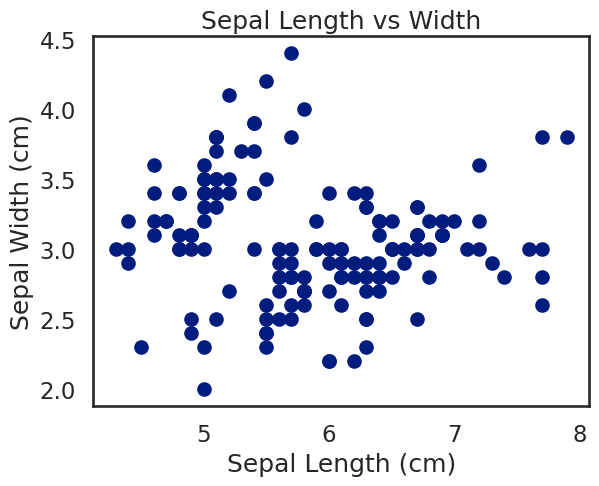

In [ ]:
ax = plt.axes()
ax.scatter(df.sepal_length, df.sepal_width)
ax.set(xlabel='Sepal Length (cm)',
       ylabel='Sepal Width (cm)',
       title='Sepal Length vs Width')
plt.show()

Similarly, histograms can be plotted of our numeric data.

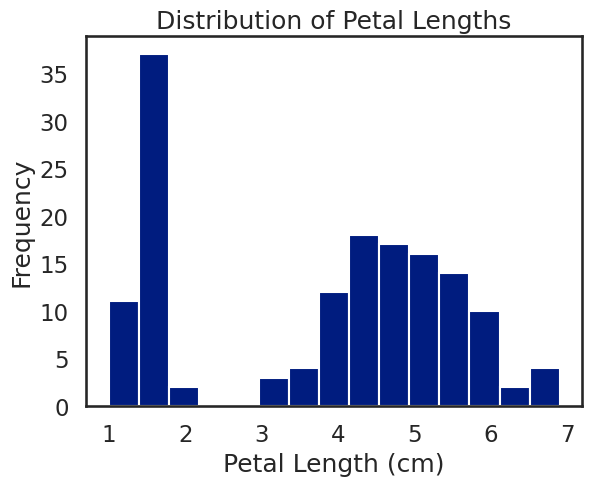

In [ ]:
plt.hist(df.petal_length, bins=15)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Frequency')
plt.title('Distribution of Petal Lengths')
plt.show()

Pandas actually provides its own built-in plotting functionality (based on matplotlib, and with a few extra settings like the grid you can see below).

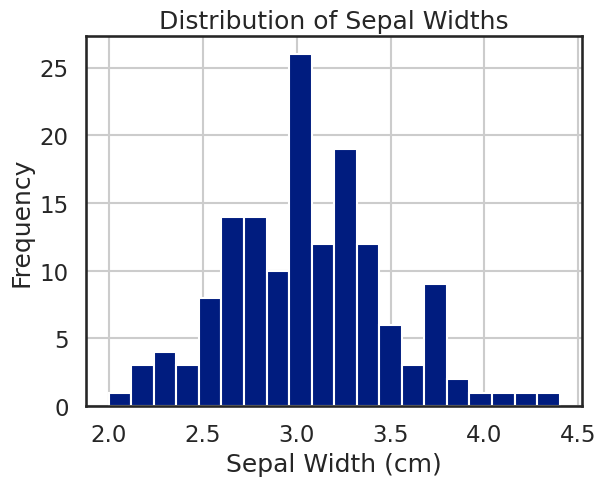

In [ ]:
ax = df.sepal_width.hist(bins=20)
ax.set(xlabel='Sepal Width (cm)',
       ylabel='Frequency',
       title='Distribution of Sepal Widths')
plt.show()

Pandas `hist()` method can also be used to plot out multiple numerical features.

AttributeError: 'Axes' object has no attribute 'is_last_row'

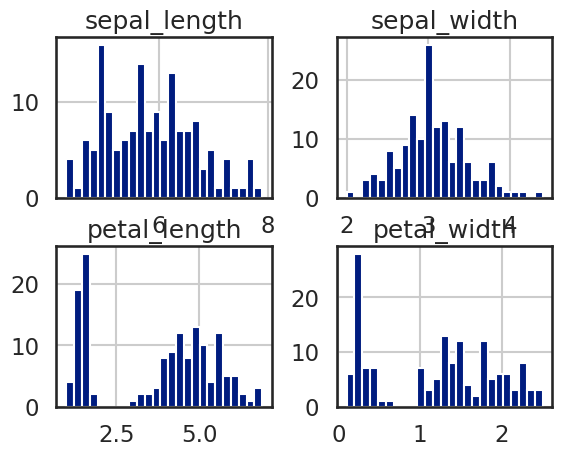

In [ ]:
axList = df.hist(bins=25)
for ax in axList.flatten():
    if ax.is_last_row():
        ax.set_xlabel('Size (cm)')

    if ax.is_first_col():
        ax.set_ylabel('Frequency')
plt.show()

[[<Axes: title={'center': 'sepal_length'}>
  <Axes: title={'center': 'sepal_width'}>]
 [<Axes: title={'center': 'petal_length'}>
  <Axes: title={'center': 'petal_width'}>]]


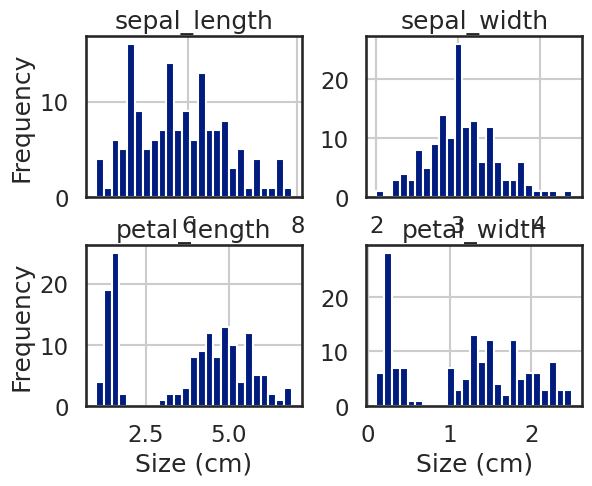

In [ ]:
#Modify:

import matplotlib.pyplot as plt

axList = df.hist(bins=25)

# Get the number of columns in the grid
num_cols = len(axList[0])

# Iterating through each subplot (Axes object) and its index
for idx, ax in enumerate(axList.flatten()):
    # Calculate the row index of the current subplot
    row_index = idx // num_cols

    # Check if it's the last row
    if row_index == len(axList) - 1:
        ax.set_xlabel('Size (cm)')

    # Check if it's the first column
    if idx % num_cols == 0:
        ax.set_ylabel('Frequency')

plt.show()

Pandas' `df.plot` includes other plotting methods, such as this interesting overlaid histogram shown below.

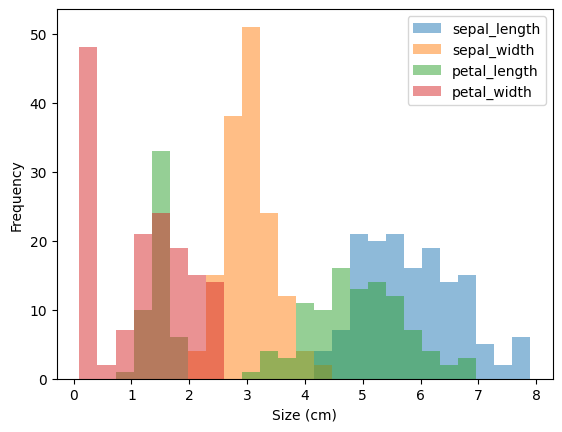

In [ ]:
ax = df.plot.hist(bins=25, alpha=0.5)
ax.set_xlabel('Size (cm)')
plt.show()

A 'boxplot' is a common way to represent the distribution of a numerical value (the box itself representing the 25%-75% quartiles, and the tails representing the max/min range).

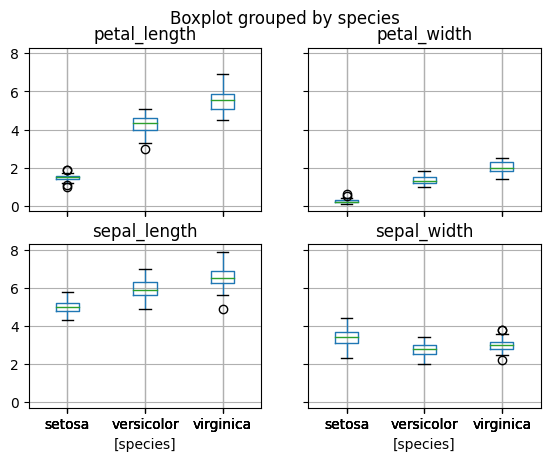

In [ ]:
df.boxplot(by='species')
plt.show()

Seaborn allows a more visually pleasing set of boxplots on a single plot, but the data itself needs a bit of massaging to be placed in the right format. Each row should contain a single data point, so the data needs to be split by groups (species). The Pandas `stack` method can help in this. The resulting dataframe should have one column for species, one for type of measurement, and one for the numerical value.

In [ ]:
reshaped_data = (df
                 .set_index('species')
                 .stack()
                 .to_frame()
                 .reset_index()
                 .rename(columns={0:'size', 'level_1': 'measurement'})
                )

print(reshaped_data.sample(10))

        species   measurement  size
306  versicolor  petal_length   4.8
521   virginica   sepal_width   2.8
200  versicolor  sepal_length   7.0
578   virginica  petal_length   5.7
331  versicolor   petal_width   1.2
280  versicolor  sepal_length   5.9
589   virginica   sepal_width   3.0
249  versicolor   sepal_width   2.2
87       setosa   petal_width   0.4
110      setosa  petal_length   1.5


<Axes: xlabel='measurement', ylabel='size'>

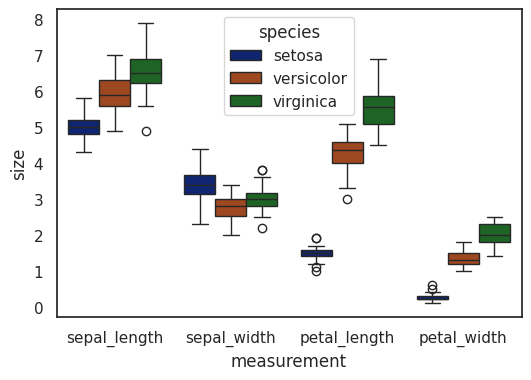

In [ ]:
sns.set_style('white')
sns.set_context('notebook')
sns.set_palette('dark')

f = plt.figure(figsize=(6, 4))
sns.boxplot(x='measurement', y='size', hue='species', data=reshaped_data)

Of course, no discussion of seaborn's capabilities is complete without showing off the `pairplot` mentioned in the lecture notes!

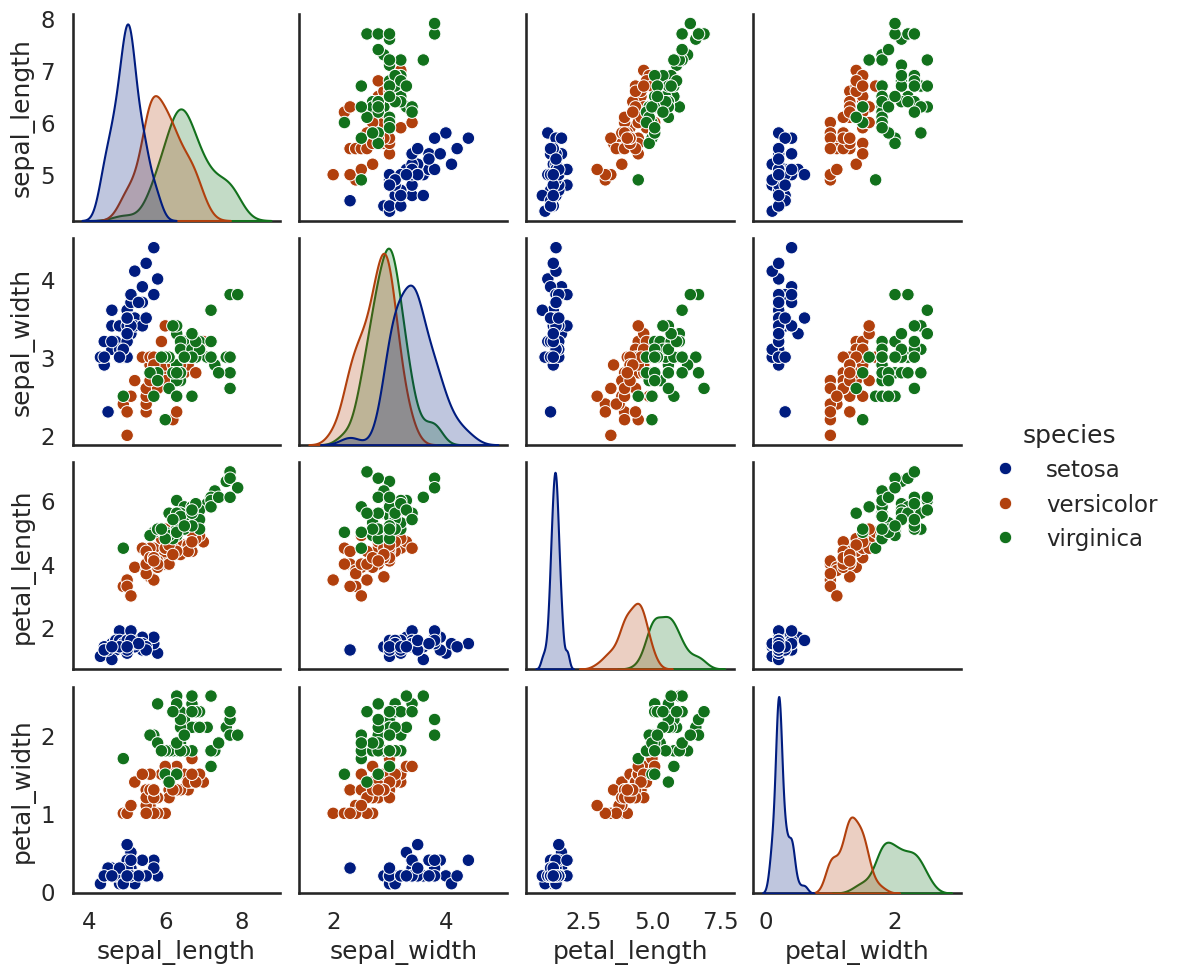

In [ ]:
sns.set_context('talk')
sns.pairplot(df, hue='species')
plt.show()